# Binary Classification/Logistic Regression

### Einführung

**Binary Classification** ist die einfachste Art der Klassifikation mit nur zwei Klassen. Sie gehört ebenfalls zur Klasse der Supervised Machine Learning Probleme. Die Targets nemen hier zwei Werte, z.B. $0$ und $1$ an.
Beispiele hierfür sind:

- Unterscheidung Email Spam/kein Spam
- Unterscheidung zweier (handgeschriebener) Buchstaben/Zahlen (hier z.B. A und B) 
<img src="letters.png" height="100" width="400"/>



Wir gehen im folgeden von $m$ Training Examples der Form
$$
(\vec{x}^{(i)}, y^{(i)}), \quad \vec{x}^{(i)}\in\mathbb{R}^n,\, y^{(i)}\in\{0,1\}
$$
aus.

Bilder der Größe $k\times m$ (wir beschränken uns auf Graustufenbilder) sind originäre Matrizen $\mathbf{A}\in\mathbb{R}^{k\times m}$ und werden zeilen- bzw. spaltenweise in einen Vektor $\vec{x}\in\mathbb{R}^{n}$ mit $n=k\cdot m$ geschrieben.





### Die Costfunction

Die Hypothese $h_{\vec{w}}(\vec{x})$ nimmt hier folgende Gestalt an
$$
h_{\vec{w}}(\vec{x}) = \frac{1}{e^{-\vec{w}^T\vec{x}}+1}
$$
wobei wir wieder (wie im Falle der Linear Regression) definieren:
$$
\vec{w} = \begin{pmatrix} w_0 \\ w_1 \\ \vdots \\ w_n \end{pmatrix},\quad 
\vec{x} = \begin{pmatrix} 1 \\ x_1 \\ \vdots \\ x_n \end{pmatrix}\,.
$$ 
Die Funktion 
$$
\sigma(z) = \frac{1}{e^{-z}+1} 
$$
heisst **Logistische Funktion** oder **Sigmoidfunktion**. Damit kann man die Hypothese wie folgt schreiben
$$
h_{\vec{w}}(\vec{x}) = \sigma(\vec{w}^T\vec{x}).
$$

Wir plotten die Funktion $h_{\vec{w}}(\vec{x})$ für $\vec{x}\in\mathbb{R}$ ...

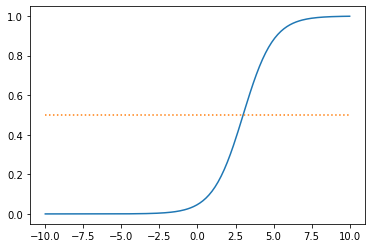

In [6]:
import numpy as np
import matplotlib.pyplot as plt

S=200
x = np.linspace(-10,10,S)
w = np.array([[-3],[1]])
y = 1.0/(np.exp(-(w[0]+w[1]*x)) + 1)

# Plotte die Funktion y=0.5 in den gleichen Plot 
# (Datenpunkte x mit h(x)<0.5 werden der Klasse 0 zugeordnet, Datenpunkte x mit h(x)>0.5 der Klasse 1)
y_e = 0.5+0*x

plt.plot(x, y)
plt.plot(x,y_e,':')
plt.show()

... und für $\vec{x}\in\mathbb{R}^2$.

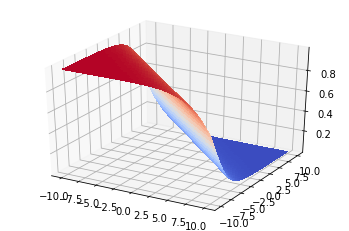

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

S=200
X,Y = np.meshgrid(np.linspace(-10,10,S),np.linspace(-10,10,S))
w = np.array([[0],[-0.5],[-0.55]])

fig = plt.figure()
ax = fig.gca(projection='3d')

Z = 1.0/(np.exp(-(w[0]+w[1]*X+w[2]*Y)) + 1)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()

Im Falle der binären Klassifikation wird folgende **Costfunction** verwendet
$$
J(\vec{w})  = -\sum_{i=1}^m y^{(i)}\log h_{\vec{w}}(\vec{x}^{(i)}) + (1-y^{(i)})\log(1-h_{\vec{w}}(\vec{x}^{(i)})).
$$
Diese Funktion ist konvex und hat damit ein globales Minimum.

### Gradient Descent
Der Gradient der Costfunction berechnet sich zu
$$
\vec{\nabla}J(\vec{w}) = \sum_{i=1}^m \left(h_{\vec{w}}(\vec{x}^{(i)})-y^{(i)}\right)\vec{x}^{(i)}\,.
$$
Zur Bestimmung der Parameter $\vec{w}$, welche die Costfunction minimieren,  wird wie im Falle der linearen Regression das Gradient Descent Verfahren 
$$
\vec{w} \rightarrow \vec{w} - \alpha \vec{\nabla}J(\vec{w})
$$
bis zur Konvergenz durchgeführt.

Wir **vektorisieren** wieder den code, indem wir Training Examples als Spaltenvektoren in ein Matrix $\mathbf{X}$ zusammenfassen. Es ergibt sich
$$
\vec{\nabla}J(\vec{w}) =  \mathbf{X}\left(\sigma\left(\mathbf{X}^T\vec{w}\right)-\vec{y}\right),\quad \mathrm{mit} \quad \mathbf{X} = \begin{pmatrix} \vec{x}^{(1)} & \ldots & \vec{x}^{(m)}\end{pmatrix}, \, \vec{y} = \begin{pmatrix} y^{(1)} \\ \vdots \\ y^{(m)} \end{pmatrix}
$$
mit 
$$
\sigma(z) = \frac{1}{e^{-z}+1}
$$

### Training Set und Test Set
Um die mit einem Machine Learning Algorithmus berechnete Hypothese $h_{\vec{w}}(\vec{x})$zu testen, wird die Gesamtmenge der vorhandenen Daten üblicherweise in zwei Teile gespilttet:

- Ein Teil mit ca. 80% wird für das eigentliche Training verwendet: **Training Set**
- Ein Teil mit ca. 20% wird für das Testen benutzt: **Test Set** 

Die sogenannte **Accuracy** ist definiert als
$$
\frac{\mathrm{Korrekte\,Anzahl\,Predictions\, im\, Test\, Set}}{\mathrm{Gesamte\,Anzahl\,der\,Daten\,im\,Test\,Set }}
$$
Sie liegt zwischen 0 und 1 und gibt den Anteil der korrekt vorhergesagten Daten aus dem Test Set an. 

### Confusion Matrix
Die sogenannte Confusion Matrix ist ein spezifisches Tabellenlayout zur Visualisierung der Perfomance eines Supervised Machine Learning Prozesses. Jede Zeile dieser Matrix repräsentiert die Instanzen der tatsächlichen Klasse, während jede Spalte die Instanzen der vorhergesagten Klasse repräsentiert (oder umgekehrt).

Für die Klassifikation der Ziffern 0 bis 9 (MNIST Datensatz) ist die Confusion Matrix in folgendem Link sehr schön illustriert: https://ml4a.github.io/demos/confusion_mnist/

### Logistische Regression mittels sklearn

Die Python-Bibliothek sklearn bietet ein entsprechende Modul für die logistische an:


https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html


Die wichtigen Methoden sind:
- fit(X,y):  Berechnet die Hypothese. Die Datenmatrix $X$ muss als $m\times n$-array vorliegen (Traingsbeipsiele zeilenweise!), der Targetvektor y als $m$-array.
- score(X,y): Bestimmt die accuracy.
- predict(X): Berechnet die Klasse = rundet die Hypothese
- predict_proba(X): Berechnet die Wahrscheinlichkeit = gibt die Hypothese aus

Wichtige Attribute sind:

- coef_ : Gibt die Parameter $(w_1,w_2,\ldots,w_n)$ zurück
- intercept_ : Gibt den Parameter $w_0$ zurück